## A3B :  Perform a probit regression on "NSSO68.csv" to identify non-vegetarians. Discuss the results and explain the characteristics and advantages of the probit model

Name : Aakash Kathirvel

VID : V01110153

Date : 07/01/2024

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# Load the dataset
data = pd.read_csv("C:/Users/Aakash/Desktop/SCMA/NSSO68.csv")
data.head()

C:\Users\Aakash\AppData\Local\Temp\ipykernel_25848\2058581863.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/Aakash/Desktop/SCMA/NSSO68.csv")


,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [40]:
# Display the first few rows of the dataset
print(data.head())

   slno                                 grp  Round_Centre  FSU_number  Round  \
0     1  40999999999999992652495293775872.0             1       41000     68   
1     2  40999999999999992652495293775872.0             1       41000     68   
2     3  40999999999999992652495293775872.0             1       41000     68   
3     4  40999999999999992652495293775872.0             1       41000     68   
4     5  40999999999999992652495293775872.0             1       41000     68   

   Schedule_Number  Sample  Sector  state  State_Region  ...  pickle_v  \
0               10       1       2     24           242  ...       0.0   
1               10       1       2     24           242  ...       0.0   
2               10       1       2     24           242  ...       0.0   
3               10       1       2     24           242  ...       0.0   
4               10       1       2     24           242  ...       0.0   

   sauce_jam_v  Othrprocessed_v  Beveragestotal_v  foodtotal_v  foodtotal_

In [41]:
# Display summary statistics
print(data.describe())

               slno  Round_Centre     FSU_number     Round  Schedule_Number  \
count  101662.00000      101662.0  101662.000000  101662.0         101662.0   
mean    50831.50000           1.0   62650.405294      68.0             10.0   
std     29347.43587           0.0   14800.582278       0.0              0.0   
min         1.00000           1.0   41000.000000      68.0             10.0   
25%     25416.25000           1.0   46527.000000      68.0             10.0   
50%     50831.50000           1.0   71793.000000      68.0             10.0   
75%     76246.75000           1.0   75374.000000      68.0             10.0   
max    101662.00000           1.0   79998.000000      68.0             10.0   

         Sample         Sector          state   State_Region       District  \
count  101662.0  101662.000000  101662.000000  101662.000000  101662.000000   
mean        1.0       1.412809      18.480475     187.075023      14.314493   
std         0.0       0.492341       9.724855      

In [42]:
# Display the column names
print(data.columns)

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)


In [43]:
# Data preprocessing
# Check for missing values
print(data.isnull().sum())

slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [49]:
# Create a binary variable for non-vegetarian status
data['non_veg'] = ((data['eggsno_q'] > 0) | 
                   (data['fishprawn_q'] > 0) | 
                   (data['goatmeat_q'] > 0) |
                   (data['beef_q'] > 0) | 
                   (data['pork_q'] > 0) | 
                   (data['chicken_q'] > 0) | 
                   (data['othrbirds_q'] > 0)).astype(int)

In [52]:
# Select relevant variables for the probit model
independent_vars = ['non_veg', 'Age', 'Sex', 'hhdsz', 'Religion', 'Education', 'MPCE_URP', 'state', 'State_Region']
X = data[independent_vars]
y = data['non_veg']

In [53]:
# Remove rows with NA values in the selected columns
X = X.dropna()
y = y.loc[X.index]

In [54]:
# Add a constant to the model
X = sm.add_constant(X)

In [35]:
# Convert X and y to numpy arrays to ensure correct data types
X = np.asarray(X, dtype=np.float64)
y = np.asarray(y, dtype=np.float64)

In [55]:
# Fit the probit regression model
probit_model = sm.Probit(y, X).fit()

c:\Users\Aakash\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Aakash\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Aakash\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Aakash\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Aakash\anac

         Current function value: 0.000000
         Iterations: 35


c:\Users\Aakash\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Aakash\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Aakash\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Aakash\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Aakash\anac

In [56]:
# Summarize the model
print(probit_model.summary())

                          Probit Regression Results                           
Dep. Variable:                non_veg   No. Observations:               101652
Model:                         Probit   Df Residuals:                   101642
Method:                           MLE   Df Model:                            9
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                   1.000
Time:                        08:36:15   Log-Likelihood:            -5.0011e-06
converged:                      False   LL-Null:                       -64125.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.5080    564.900     -0.013      0.989   -1114.691    1099.675
non_veg         13.2214    240.714      0.055      0.956    -458.568     485.011
Age              0.0078      5.899      0.00

In [57]:
# Make predictions
data_clean['predicted_prob'] = probit_model.predict(X)

c:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

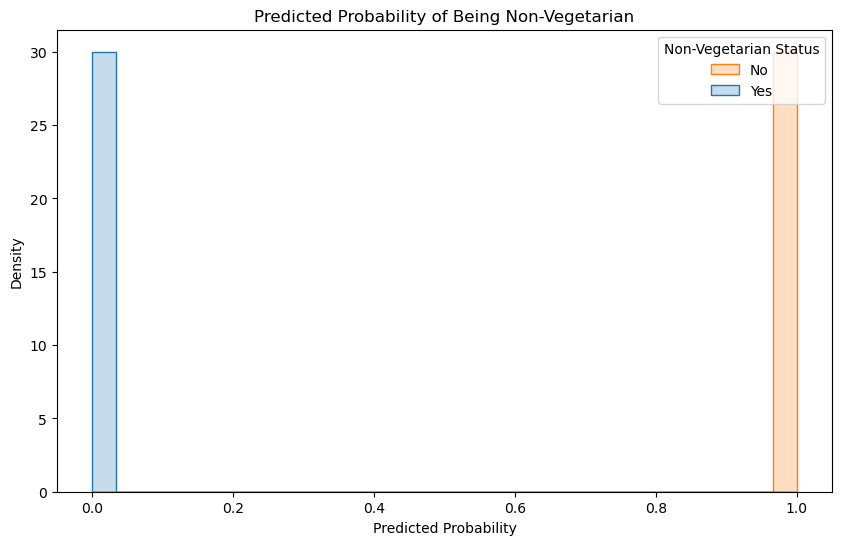

In [58]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.histplot(data=data_clean, x='predicted_prob', hue='non_veg', bins=30, element="step", stat="density", common_norm=False)
plt.title('Predicted Probability of Being Non-Vegetarian')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend(title='Non-Vegetarian Status', labels=['No', 'Yes'])
plt.show()